#### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the csv

In [2]:
df = pd.read_csv('C:\\Users\\shrim\\Downloads\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
A free copy of Mastering The Interview              0
Magazine                                            0
Search                                              0
Newspaper Article                                   0
Last Notable Activity                               0
Lead Number                                         0
Lead Origin                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                 

##### We can see few columns has lot of missing values. So removing the rows would cause loss of data. SO its better we remove columns itself as they dont add significance to our predicion.

### **Cleaning the Dataframe**

In [6]:
df = df.drop(['Tags','Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Lead Number',
            'Digital Advertisement', 'Through Recommendations','Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality'], axis=1)

In [7]:
df.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
A free copy of Mastering The Interview              0
Total Time Spent on Website                         0
Last Notable Activity                               0
Converted                                           0
Do Not Call                                         0
Do Not Email                                        0
Lead Origin                                         0
Lead Source                                        36
Last Activity                                     103
Page Views Per Visit                              137
TotalVisits                                       137
City                                             1420
Specialization                                   1438
How did you hear about X Edu

#### We still have lot to null values in the last columns in above result. Let's analyze those columns

In [8]:
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [9]:
# This column has 2709 null values. We can consider replacing those values with 'unknown' or we can remove those rows itself.
# I prefer replacing with 'unknown' as we dont want to lose data.
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('unknown')

In [10]:
df['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [11]:
# This 'Lead Profile' column has 2709 null values and 4146 select values. The select value probably means that score is not assigned to that profile. Hence it is as good as a null value.
# Hence dropping this column.
df = df.drop(['Lead Profile'], axis=1)

In [12]:
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [13]:
# This column has 2690 null values. We can consider replacing those values with 'unknown' or we can remove those rows itself.
# I prefer replacing with 'unknown' as we dont want to lose data.
df['What is your current occupation'] = df['What is your current occupation'].fillna('unknown')

In [14]:
df['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [15]:
# Again replacing null values with 'unknown'
df['Country'] = df['Country'].fillna('unknown')

In [16]:
df['Specialization'].value_counts(dropna=False)

Specialization
Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [17]:
# As of now we didnt drop a single row. So for this feature We shall choose to drop the rows which are null.

In [18]:
df = df[~pd.isnull(df['Specialization'])]

In [19]:
df['How did you hear about X Education'].value_counts(dropna=False)

How did you hear about X Education
Select                   5043
Online Search             807
NaN                       772
Word Of Mouth             348
Student of SomeSchool     309
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      25
SMS                        23
Name: count, dtype: int64

In [20]:
# For this feature we can see that there are 5043 'select' values. So we choose to drop it as these values are unknowns
df = df.drop(['How did you hear about X Education'], axis = 1)

In [21]:
print(df.isnull().sum().sort_values())
print(df.shape)

Prospect ID                                        0
I agree to pay the amount through cheque           0
Get updates on DM Content                          0
Update me on Supply Chain Content                  0
Receive More Updates About Our Courses             0
What matters most to you in choosing a course      0
What is your current occupation                    0
Specialization                                     0
A free copy of Mastering The Interview             0
Country                                            0
Total Time Spent on Website                        0
Converted                                          0
Do Not Call                                        0
Do Not Email                                       0
Lead Origin                                        0
Last Notable Activity                              0
City                                              14
Lead Source                                       36
Last Activity                                 

In [22]:
# Variable city, Prospect ID won't be useful to us for prediction so we'll remove this column
df = df.drop(['City', 'Prospect ID'], axis = 1)

### Since null values are very few. well drop all rows with null values.

In [23]:
df = df[df.isnull().sum(axis=1) <1]

In [24]:
df.shape

(7643, 19)

In [25]:
print(df.isnull().sum().sort_values())

Lead Origin                                      0
I agree to pay the amount through cheque         0
Get updates on DM Content                        0
Update me on Supply Chain Content                0
Receive More Updates About Our Courses           0
What matters most to you in choosing a course    0
What is your current occupation                  0
Specialization                                   0
A free copy of Mastering The Interview           0
Country                                          0
Page Views Per Visit                             0
Total Time Spent on Website                      0
TotalVisits                                      0
Converted                                        0
Do Not Call                                      0
Do Not Email                                     0
Lead Source                                      0
Last Activity                                    0
Last Notable Activity                            0
dtype: int64


In [26]:
# Total rows after droppping
len(df.index)/9240

0.8271645021645022

#### **We retained 82.5% rows after removing the nulls. That is a great retention.**

In [27]:
# Lets check the dataframe again
df.head(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,unknown,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Unemployed,Better Career Prospects,No,No,No,No,No,Modified
6,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Unemployed,Better Career Prospects,No,No,No,No,No,Modified
8,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,IT Projects Management,unknown,unknown,No,No,No,No,Yes,Email Opened
9,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,Finance Management,unknown,unknown,No,No,No,No,No,Email Opened
10,Landing Page Submission,Organic Search,No,No,1,8.0,1351,8.00,Email Opened,India,Travel and Tourism,Unemployed,Better Career Prospects,No,No,No,No,Yes,Email Opened
11,Landing Page Submission,Direct Traffic,No,No,1,8.0,1343,2.67,Page Visited on Website,India,Human Resource Management,Unemployed,Better Career Prospects,No,No,No,No,Yes,Page Visited on Website


In [28]:
# The column 'I agree to pay the amount through cheque' has no significance. SO dropping the column
df = df.drop(['I agree to pay the amount through cheque'], axis = 1)

##### Now we are going to create some dummy variables out of categorical variables. SO If possible we'll try to reduce the number of unique values fro from categorical columns.

In [29]:
# Country column has too many values. We'll reduce the values to simplify

def country_reduction(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "unknown":
        category = "unknown"
    else:
        category = "foreigner"
    return category
    
df['Country'] = df.apply(lambda x:country_reduction(x['Country']), axis = 1)

In [30]:
df['Country'].value_counts()

Country
India        5924
unknown      1457
foreigner     262
Name: count, dtype: int64

In [31]:
print(df.isnull().sum().sort_values())
print(df.shape)

Lead Origin                                      0
Get updates on DM Content                        0
Update me on Supply Chain Content                0
Receive More Updates About Our Courses           0
What matters most to you in choosing a course    0
What is your current occupation                  0
Specialization                                   0
Country                                          0
Last Activity                                    0
Page Views Per Visit                             0
Total Time Spent on Website                      0
TotalVisits                                      0
Converted                                        0
Do Not Call                                      0
Do Not Email                                     0
Lead Source                                      0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64
(7643, 18)


### **Univariate Analysis**

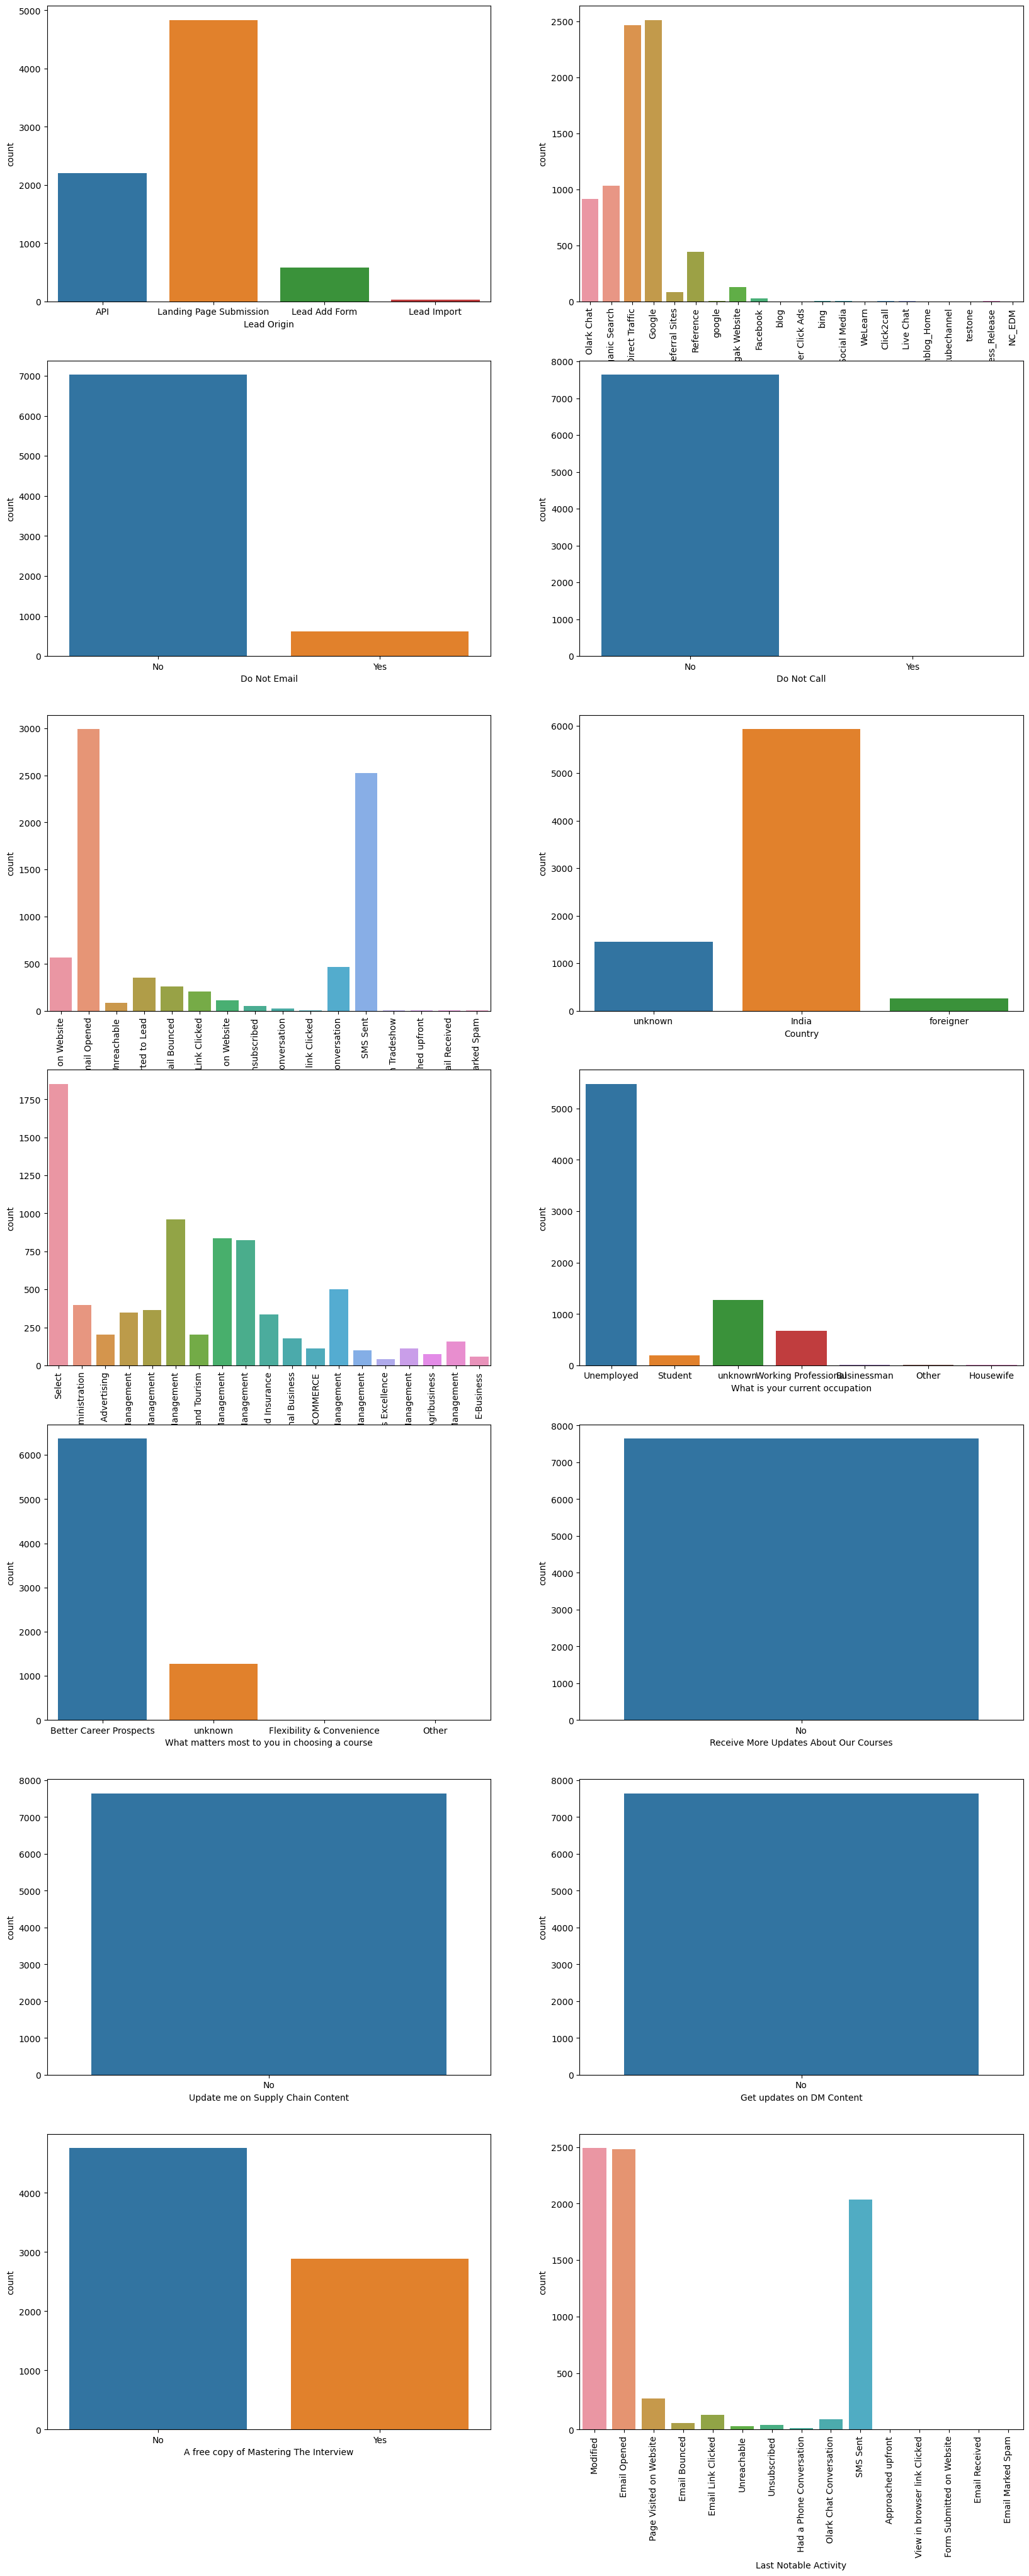

In [32]:
plt.figure(figsize = (20,50))
plt.subplot(7,2,1)
sns.countplot(x='Lead Origin', data=df)
plt.subplot(7,2,2)
sns.countplot(x='Lead Source', data=df).tick_params(axis='x', rotation = 90)
plt.subplot(7,2,3)
sns.countplot(x='Do Not Email', data=df)
plt.subplot(7,2,4)
sns.countplot(x='Do Not Call', data=df)
plt.subplot(7,2,5)
sns.countplot(x='Last Activity', data=df).tick_params(axis='x', rotation = 90)
plt.subplot(7,2,6)
sns.countplot(x='Country', data=df)
plt.subplot(7,2,7)
sns.countplot(x='Specialization', data=df).tick_params(axis='x', rotation = 90)
plt.subplot(7,2,8)
sns.countplot(x='What is your current occupation', data=df)
plt.subplot(7,2,9)
sns.countplot(x='What matters most to you in choosing a course', data=df)
plt.subplot(7,2,10)
sns.countplot(x='Receive More Updates About Our Courses', data=df)
plt.subplot(7,2,11)
sns.countplot(x='Update me on Supply Chain Content', data=df)
plt.subplot(7,2,12)
sns.countplot(x='Get updates on DM Content', data=df)
plt.subplot(7,2,13)
sns.countplot(x='A free copy of Mastering The Interview', data=df)
plt.subplot(7,2,14)
sns.countplot(x='Last Notable Activity', data=df).tick_params(axis='x', rotation = 90)

plt.show()

#### We can see from above plots that columns 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 'Do not call' have only 'No' value. So they dont add any info. So we can drop those columns.


In [33]:
df = df.drop(['Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Do Not Call'], axis=1)

In [34]:
varlist = ['Do Not Email','A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})
df[varlist] = df[varlist].apply(binary_map)

## **Dummy Variables**

In [35]:
# Lets check all the categorical variable present in our df
df.dtypes

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                       int64
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
A free copy of Mastering The Interview             int64
Last Notable Activity                             object
dtype: object

In [36]:
# Creating dummy variables from categorical variables
dummy_df = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity','Country','What is your current occupation','Specialization',
                              'What matters most to you in choosing a course', 
                              'Last Notable Activity']], drop_first=True, dtype=int)

# concatenating dummy_df and df
df = pd.concat([df, dummy_df], axis=1)

In [37]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,unknown,Select,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Select,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Select,...,0,0,0,1,0,0,0,0,0,0


In [38]:
# dropping the columns for which the dummy variables are created
df = df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Country','What is your current occupation','Specialization',
                              'What is your current occupation','What matters most to you in choosing a course','A free copy of Mastering The Interview', 
                              'Last Notable Activity'], axis = 1)
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [39]:
df = df.drop(['Specialization_Select'], axis = 1)

In [40]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


### Train-Test-Split

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [42]:
X = df.drop(['Converted'], axis = 1)
y = df['Converted']

In [43]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


#### We'll take 72% as train and 28% as test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.72, test_size=0.28, random_state=100)

In [45]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
9070,0.028369,0.132482,0.036364,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7074,0.014184,0.511884,0.036364,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7952,0.035461,0.745599,0.090909,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1641,0.000000,0.000000,0.000000,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
127,0.035461,0.044014,0.090909,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


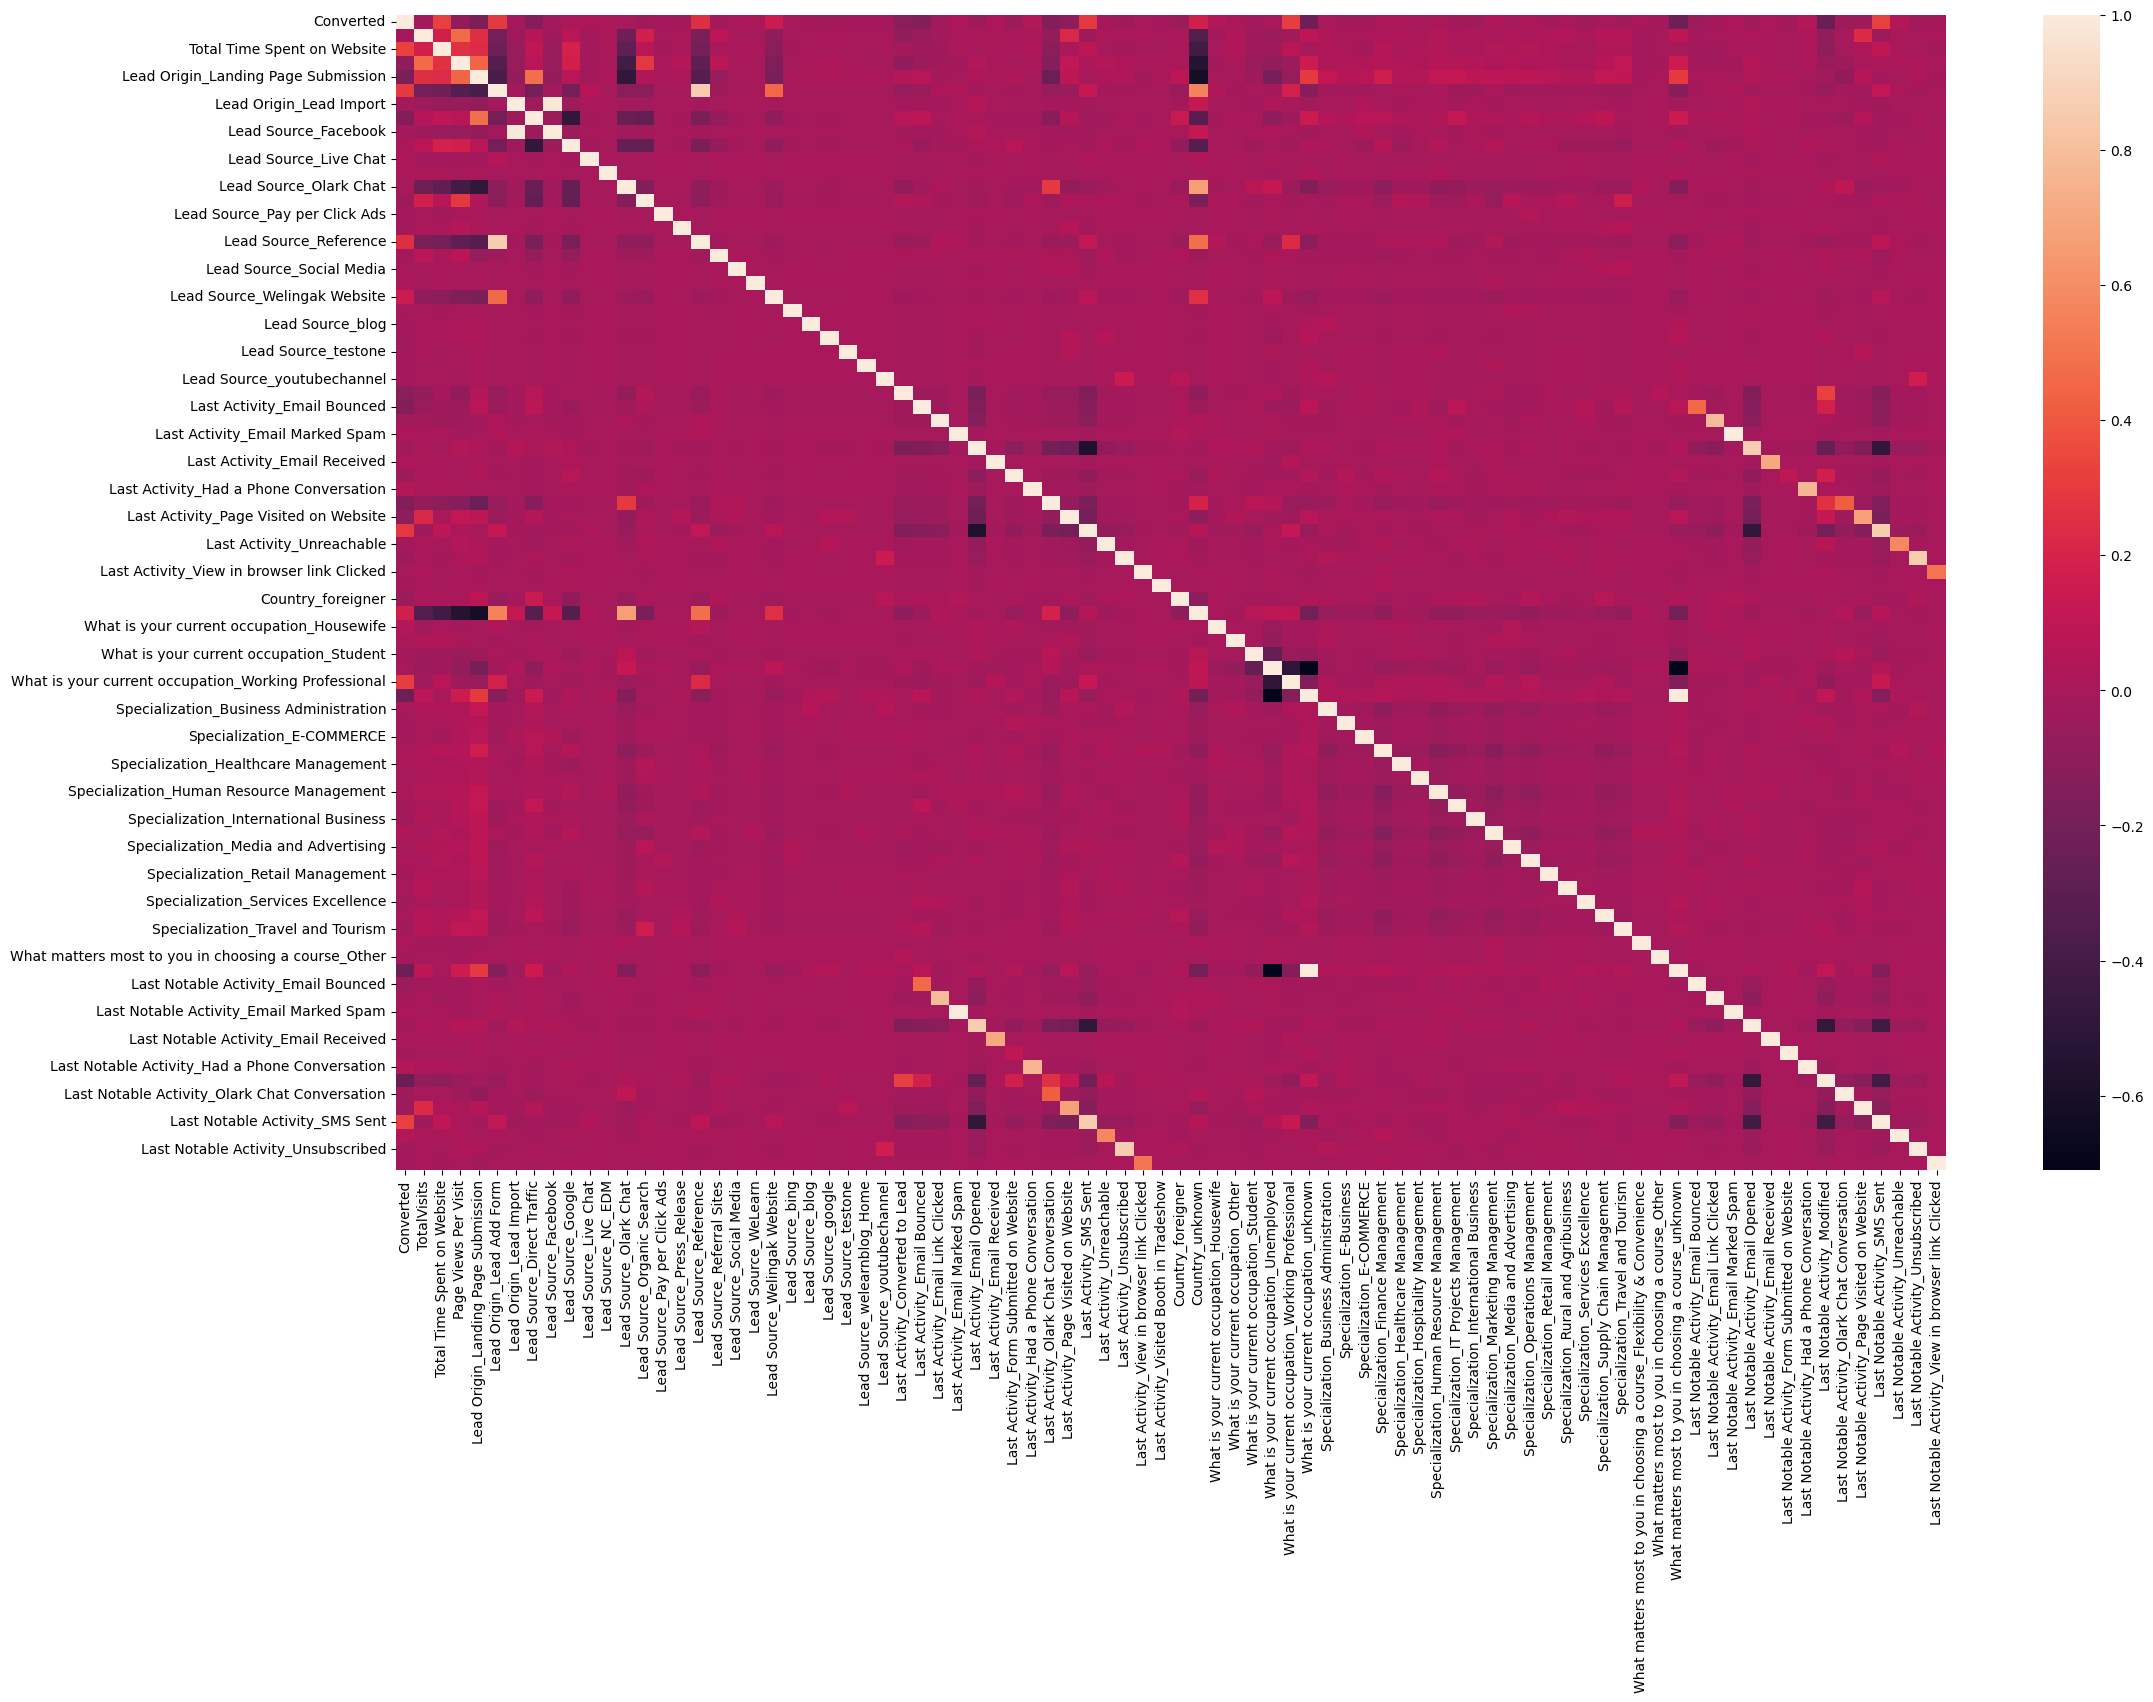

In [46]:
# NOw we can look at correlation b/w variables
plt.figure(figsize = (25,15))
sns.heatmap(df.corr())
plt.show()

### **Model Building**

In [47]:
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix

In [48]:
logRegression = LogisticRegression()
rfe = RFE(logRegression, n_features_to_select = 15)             # we select 15 variables
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 42),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', False, 48),
 ('Lead Source_Live Chat', False, 52),
 ('Lead Source_NC_EDM', False, 67),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 47),
 ('Lead Source_Pay per Click Ads', False, 44),
 ('Lead Source_Press_Release', False, 32),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', False, 46),
 ('Lead Source_Social Media', False, 55),
 ('Lead Source_WeLearn', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 66),
 ('Lead Source_blog', False, 50),
 ('Lead Source_google', False, 45),
 ('Lead Source_testone', False, 37),
 ('Lead Source_welearnblog_Home', False, 53),
 (

In [50]:
select_cols = X_train.columns[rfe.support_]
select_cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What is your current occupation_unknown',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [51]:
X_train = X_train[select_cols]
X_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Working Professional,What is your current occupation_unknown,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
9070,0.028369,0.132482,0.036364,0,0,0,0,0,0,0,0,1,0,0,0
7074,0.014184,0.511884,0.036364,0,0,0,0,0,0,0,0,0,0,1,0
7952,0.035461,0.745599,0.090909,0,0,0,0,0,0,0,0,0,0,0,0
1641,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0
127,0.035461,0.044014,0.090909,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.063830,0.368838,0.081818,0,0,0,0,0,0,0,0,1,0,0,0
4822,0.035461,0.803697,0.045455,0,0,0,0,0,0,0,0,0,0,0,0
7202,0.014184,0.776408,0.036364,0,0,0,0,0,0,0,0,0,0,0,0
8400,0.056738,0.015405,0.036364,0,0,0,0,0,0,0,0,1,0,1,0


In [52]:
import statsmodels.api as sm

In [53]:
logm1 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
res = logm1.fit().summary()
res

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5502
Model:                            GLM   Df Residuals:                     5486
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2435.2
Date:                Tue, 30 Jul 2024   Deviance:                       4870.5
Time:                        00:19:10   Pearson chi2:                 5.68e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3843
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8592      0.102    -18.227      0.000      -2.059      -1.659
TotalVisits                                              4.1652      1.509      2.760      0.006       1.207       7.123
Total Time Spent on Website                              4.4947      0.170     26.384      0.000       4.161       4.829
Page Views Per Visit                                    -2.9937      1.282     -2.334      0.020      -5.507      -0.480
Lead Origin_Lead Add Form                                3.7114      0.244     15.227      0.000       3.234       4.189
Lead Source_Olark Chat                                   1.3263      0.126     10.552      0.000       1.080       1.573
Lead Source_Welingak Website                             1.6508      0.755      2.186      0.029       0.170       3.131
Last Activity_Email Bounced                             -1.8638      0.365     -5.107      0.000      -2.579      -1.149
Last Activity_Had a Phone Conversation                   0.8950      0.908      0.986      0.324      -0.884       2.674
Last Activity_SMS Sent                                   1.0712      0.077     13.987      0.000       0.921       1.221
What is your current occupation_Housewife               22.8278   1.68e+04      0.001      0.999   -3.29e+04    3.29e+04
What is your current occupation_Working Professional     2.6912      0.197     13.627      0.000       2.304       3.078
What is your current occupation_unknown                 -1.1405      0.113    -10.113      0.000      -1.362      -0.919
Last Notable Activity_Had a Phone Conversation           2.4763      1.433      1.728      0.084      -0.332       5.285
Last Notable Activity_Modified                          -0.7970      0.082     -9.725      0.000      -0.958      -0.636
Last Notable Activity_Unreachable                        2.0567      0.533      3.858      0.000       1.012       3.101
========================================================================================================================
"""

#### Before dropping any variable. let's analyze the VIF first.

### Checking the VIF

In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.55
0,TotalVisits,2.70
7,Last Activity_Had a Phone Conversation,2.39
12,Last Notable Activity_Had a Phone Conversation,2.39
1,Total Time Spent on Website,1.94
8,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.50
13,Last Notable Activity_Modified,1.43
5,Lead Source_Welingak Website,1.34
11,What is your current occupation_unknown,1.26


### VIF is low enough. WE'll remove the variable which has high P-value

### We'll remove 'What is your current occupation_Housewife' as it has highest p-value.

In [55]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [56]:
# Fitting the model again
logm1 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
res = logm1.fit().summary()
res

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5502
Model:                            GLM   Df Residuals:                     5487
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2439.7
Date:                Tue, 30 Jul 2024   Deviance:                       4879.4
Time:                        00:19:10   Pearson chi2:                 5.69e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3833
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8509      0.102    -18.172      0.000      -2.051      -1.651
TotalVisits                                              4.1434      1.506      2.751      0.006       1.191       7.095
Total Time Spent on Website                              4.4925      0.170     26.402      0.000       4.159       4.826
Page Views Per Visit                                    -3.0163      1.282     -2.353      0.019      -5.529      -0.504
Lead Origin_Lead Add Form                                3.7230      0.243     15.291      0.000       3.246       4.200
Lead Source_Olark Chat                                   1.3194      0.126     10.507      0.000       1.073       1.565
Lead Source_Welingak Website                             1.6329      0.755      2.162      0.031       0.153       3.113
Last Activity_Email Bounced                             -1.8688      0.365     -5.122      0.000      -2.584      -1.154
Last Activity_Had a Phone Conversation                   0.8881      0.907      0.979      0.328      -0.891       2.667
Last Activity_SMS Sent                                   1.0663      0.077     13.930      0.000       0.916       1.216
What is your current occupation_Working Professional     2.6866      0.197     13.607      0.000       2.300       3.074
What is your current occupation_unknown                 -1.1440      0.113    -10.149      0.000      -1.365      -0.923
Last Notable Activity_Had a Phone Conversation           2.4786      1.433      1.730      0.084      -0.330       5.287
Last Notable Activity_Modified                          -0.7956      0.082     -9.720      0.000      -0.956      -0.635
Last Notable Activity_Unreachable                        2.0523      0.533      3.850      0.000       1.007       3.097
========================================================================================================================
"""

In [57]:
# Re-checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.55
0,TotalVisits,2.70
7,Last Activity_Had a Phone Conversation,2.39
11,Last Notable Activity_Had a Phone Conversation,2.39
1,Total Time Spent on Website,1.94
8,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.50
12,Last Notable Activity_Modified,1.43
5,Lead Source_Welingak Website,1.34
10,What is your current occupation_unknown,1.26


### VIF is low enough. But P value of 'Last Activity_Had a Phone Conversation' is a bit high. So removing that varible.

In [58]:
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [59]:
# Fitting the model again
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5502
Model:                            GLM   Df Residuals:                     5488
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2440.1
Date:                Tue, 30 Jul 2024   Deviance:                       4880.3
Time:                        00:19:11   Pearson chi2:                 5.69e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3832
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8493      0.102    -18.161      0.000      -2.049      -1.650
TotalVisits                                              4.1557      1.507      2.757      0.006       1.201       7.110
Total Time Spent on Website                              4.4918      0.170     26.404      0.000       4.158       4.825
Page Views Per Visit                                    -3.0299      1.282     -2.364      0.018      -5.542      -0.518
Lead Origin_Lead Add Form                                3.7201      0.243     15.282      0.000       3.243       4.197
Lead Source_Olark Chat                                   1.3166      0.126     10.491      0.000       1.071       1.563
Lead Source_Welingak Website                             1.6340      0.755      2.164      0.030       0.154       3.114
Last Activity_Email Bounced                             -1.8718      0.365     -5.131      0.000      -2.587      -1.157
Last Activity_SMS Sent                                   1.0649      0.077     13.917      0.000       0.915       1.215
What is your current occupation_Working Professional     2.6901      0.197     13.631      0.000       2.303       3.077
What is your current occupation_unknown                 -1.1458      0.113    -10.168      0.000      -1.367      -0.925
Last Notable Activity_Had a Phone Conversation           3.3659      1.110      3.032      0.002       1.190       5.541
Last Notable Activity_Modified                          -0.7910      0.082     -9.685      0.000      -0.951      -0.631
Last Notable Activity_Unreachable                        2.0519      0.533      3.849      0.000       1.007       3.097
========================================================================================================================
"""

In [60]:
# Re-checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,3.55
0,TotalVisits,2.70
1,Total Time Spent on Website,1.94
7,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.50
11,Last Notable Activity_Modified,1.43
5,Lead Source_Welingak Website,1.34
9,What is your current occupation_unknown,1.26
8,What is your current occupation_Working Profes...,1.18
4,Lead Source_Olark Chat,1.11


### Seems like VIF's are low enought and P values are also less than 0.05. So we can stop here.

### **Let's test our model**

In [61]:
# Probabilities on the training set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:15]

9070    0.083760
7074    0.403186
7952    0.797654
1641    0.135956
127     0.071053
2532    0.084949
1524    0.201738
5589    0.223400
8213    0.920293
8518    0.198076
6444    0.477564
2194    0.614000
1       0.375864
4293    0.369893
7244    0.394451
dtype: float64

In [62]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08376041, 0.40318575, 0.79765409, 0.13595583, 0.07105304,
       0.08494858, 0.20173842, 0.22340014, 0.92029262, 0.1980761 ])

In [63]:
# Actually converted vs model probability
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.083760
1,0,0.403186
2,1,0.797654
3,0,0.135956
4,0,0.071053


In [64]:
# We'll set cutoff as 0.5. Which is the most intuitive.
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.083760,0
1,0,0.403186,0
2,1,0.797654,1
3,0,0.135956,0
4,0,0.071053,0


### **Let's evaluate model**

### **Confusion matrix**  

In [67]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2676,  423],
       [ 688, 1715]], dtype=int64)

In [68]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7980734278444203

### We got an accuracy of about 80%. Which is quite good.

In [69]:
# true positive
TP = confusion[1,1]
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0]

In [70]:
# Sensitivity
TP/(TP+FN)

0.7136912193091969

In [71]:
# Specificity
TN/(TN+FP)

0.8635043562439496

### **Prediction the test Set.**

In [79]:
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
     

#### **Scaling**

In [80]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
col = X_train.columns
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,What is your current occupation_Working Professional,What is your current occupation_unknown,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3879,1.0,0.014184,0.170335,0.036364,0,0,0,0,0,0,1,0,1,0
4168,1.0,0.021277,0.197623,0.054545,0,0,0,0,1,1,0,0,0,0
7510,1.0,0.014184,0.102553,0.036364,0,0,0,0,1,0,0,0,0,0
2935,1.0,0.028369,0.724472,0.072727,0,0,0,0,1,0,0,0,0,0
7245,1.0,0.078014,0.842430,0.066727,0,0,0,0,1,0,0,0,0,0


In [81]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.044269
1,1,0.937997
2,0,0.407347
3,1,0.914303
4,1,0.957778


#### Making prediction using cut off 0.35

In [82]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.044269,0
1,1,0.937997,1
2,0,0.407347,1
3,1,0.914303,1
4,1,0.957778,1
...,...,...,...
2136,1,0.606133,1
2137,1,0.925526,1
2138,0,0.075684,0
2139,1,0.970823,1


### Accuracy

In [84]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7781410555815039

#### Confusion matrix

In [85]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[905, 355],
       [120, 761]], dtype=int64)

In [86]:
# true positive
TP = confusion2[1,1]
# true negatives
TN = confusion2[0,0]
# false positives
FP = confusion2[0,1] 
# false negatives
FN = confusion2[1,0]

#### Sensitivity

In [87]:
TP/(TP+FN)

0.8637911464245176

#### Specificity

In [88]:
TN/(TN+FP)

0.7182539682539683

### **With the current cut off point we can see that Sensitivity is 86% and Specificity is 72%**

### **Precision and recall**

In [91]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2676,  423],
       [ 688, 1715]], dtype=int64)

In [92]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8021515434985969

In [93]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7136912193091969

#### With current cut off of 0.35% we got Precision of 80% and Recall of 71%

#### **Precision-Recall tradeOff**

In [94]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

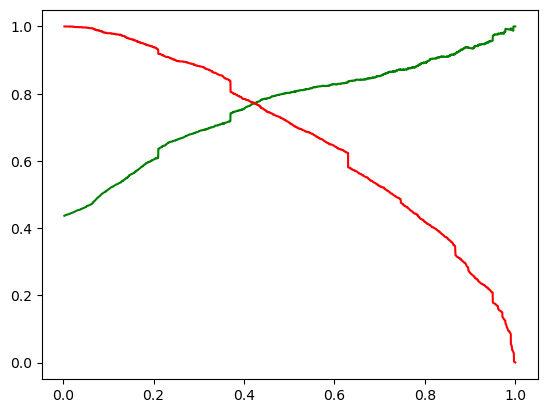

In [95]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [96]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,final_predicted
0,0,0.083760,0,0
1,0,0.403186,0,0
2,1,0.797654,1,1
3,0,0.135956,0,0
4,0,0.071053,0,0


In [97]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2517,  582],
       [ 530, 1873]], dtype=int64)

In [98]:
# true positive
TP = confusion2[1,1]
# true negatives
TN = confusion2[0,0]
# false positives
FP = confusion2[0,1] 
# false negatives
FN = confusion2[1,0]

In [101]:
# Precision
TP / (TP + FP)

0.7629327902240326

In [102]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7794423637120267

#### **for cutoff of 0.41 we have Precision of 76% and recall of 78%**

## **Final Conclusion**

### The most signigicant variables for best lead prediction are
##### 1] TotalVisits
##### 2] Total Time Spent on Website
##### 3] Page Views Per Visit
##### 4] 	Lead Origin_Lead Add Form
##### 5]	Lead Source_Olark Chat
##### 6] 	Lead Source_Welingak Website
##### 7]	Last Activity_Email Bounced
##### 8] 	WLast Activity_SMS Sent
##### 9] 	What is your current occupation_Working Profes.
##### 10]	Lead Source_Olark Chat 
##### 11] Last Activity_Email Bounced
##### 12]	Last Notable Activity_Unreachable 
##### 13]	Last Notable Activity_Had a Phone Conversation